In [8]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
data_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv"
df = pd.read_csv(data_path)

# 目标变量
y = df["Diagnosis"]

# 存储回归结果
regression_results = []

for col in df.columns[1:]:  # 跳过 Diagnosis
    X = df[[col]]
    X_with_const = sm.add_constant(X)  # 添加常数项

    # 运行线性回归
    model = sm.OLS(y, X_with_const).fit()

    # 获取回归结果
    coefficient = model.params.iloc[1]  # 变量的回归系数
    p_value = model.pvalues.iloc[1]  # p-value
    r2_score = model.rsquared  # R² 线性拟合得分

    regression_results.append({
        "Feature": col,
        "Coefficient": coefficient,
        "P_value": p_value,
        "R2_LinearFit": r2_score
    })

# 转换为 DataFrame 并打印
regression_results_df = pd.DataFrame(regression_results)
regression_results_df = regression_results_df.sort_values(by="P_value")

print("\n Linear Regression Analysis：")
print(regression_results_df)


 Linear Regression Analysis：
                    Feature  Coefficient        P_value  R2_LinearFit
27     concave_points_worst     0.383683  1.969100e-124      0.629747
22          perimeter_worst     0.378533  5.771397e-119      0.612955
7       concave_points_mean     0.375487  7.101150e-116      0.603129
20             radius_worst     0.375410  8.482292e-116      0.602880
2            perimeter_mean     0.359059  8.436251e-101      0.551508
23               area_worst     0.354799   2.828848e-97      0.538499
0               radius_mean     0.352963   8.465941e-96      0.532942
3                 area_mean     0.342788   4.734564e-88      0.502658
6            concavity_mean     0.336685   9.966556e-84      0.484917
26          concavity_worst     0.318917   2.464664e-72      0.435086
5          compactness_mean     0.288420   3.938263e-56      0.355852
25        compactness_worst     0.285743   7.069816e-55      0.349279
10                radius_se     0.274205   9.738949e-50     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

# ========== 1. 读取数据 ==========
df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")

# 目标变量
y = df["Diagnosis"]

# ========== 2. 变量线性关系可视化（散点图 + 线性拟合）==========
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns[1:], 1):  # 跳过 Diagnosis 这一列
    plt.subplot(5, 6, i)
    sns.regplot(x=df[col], y=y, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
    plt.xlabel(col)
    plt.ylabel("Diagnosis")

plt.suptitle("Feature vs Diagnosis - Linear Relationship Check", fontsize=16)
plt.tight_layout()
plt.show()

# ========== 3. 计算 Pearson 相关性 & Spearman 相关性 ==========
linear_results = []

for col in df.columns[1:]:  # 跳过 Diagnosis
    X = df[[col]]
    
    # 计算 Pearson 相关系数（线性相关性）
    pearson_corr = df[col].corr(y)
    
    # 计算 Spearman 相关系数（非线性相关性）
    spearman_corr, _ = spearmanr(df[col], y)
    
    # 线性回归 R² 值
    model = LinearRegression()
    model.fit(X, y)
    r2_score = model.score(X, y)
    
    linear_results.append({
        "Feature": col,
        "Pearson_Correlation": pearson_corr,
        "Spearman_Correlation": spearman_corr,
        "R2_LinearFit": r2_score
    })

# 转换为 DataFrame 并显示
linear_results_df = pd.DataFrame(linear_results)

# ✅ 修正：改用 print() 显示结果
print("\n📊 线性关系分析结果：")
print(linear_results_df.sort_values(by="Pearson_Correlation", ascending=False))


📊 线性分析结果：
                    Feature  Pearson_Correlation  Spearman_Correlation  \
27     concave_points_worst             0.793566              0.781674   
22          perimeter_worst             0.782914              0.796319   
7       concave_points_mean             0.776614              0.777877   
20             radius_worst             0.776454              0.787933   
2            perimeter_mean             0.742636              0.748496   
23               area_worst             0.733825              0.786902   
0               radius_mean             0.730029              0.732785   
3                 area_mean             0.708984              0.734122   
6            concavity_mean             0.696360              0.733308   
26          concavity_worst             0.659610              0.705734   
5          compactness_mean             0.596534              0.609288   
25        compactness_worst             0.590998              0.606810   
10                radius_se

In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

# 设置文件路径
data_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast+cancer+wisconsin+diagnostic/wdbc.data"
output_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv"

# 定义列名
column_names = ["ID", "Diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
                "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
                "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
                "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se",
                "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
                "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
                "symmetry_worst", "fractal_dimension_worst"]

# 读取数据
if os.path.exists(data_file_path):
    df = pd.read_csv(data_file_path, header=None, names=column_names)

    # 删除无用的 ID 列
    df.drop(columns=["ID"], inplace=True)

    # 将目标变量 Diagnosis 转换为数值 (M=1, B=0)
    df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

    # 归一化数据（不包括 Diagnosis）
    scaler = StandardScaler()
    df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

    # 保存清理后的数据
    df.to_csv(output_file_path, index=False)
    print(f"✅ 清理后的数据已保存到: {output_file_path}")

else:
    print("❌ 文件路径错误，请检查文件是否存在。")

✅ 清理后的数据已保存到: /Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv


✅ 原始数据读取成功！

📊 所有特征的 VIF 计算结果:
                     Feature          VIF
0               radius_mean  3806.115296
2            perimeter_mean  3786.400419
20             radius_worst   799.105946
22          perimeter_worst   405.023336
3                 area_mean   347.878657
23               area_worst   337.221924
10                radius_se    75.462027
6            concavity_mean    70.767720
12             perimeter_se    70.359695
7       concave_points_mean    60.041733
5          compactness_mean    50.505168
13                  area_se    41.163091
25        compactness_worst    36.982755
27     concave_points_worst    36.763714
26          concavity_worst    31.970723
29  fractal_dimension_worst    18.861533
21            texture_worst    18.569966
9    fractal_dimension_mean    15.756977
16             concavity_se    15.694833
15           compactness_se    15.366324
1              texture_mean    11.884048
17        concave_points_se    11.520796
24         smoothness_wor

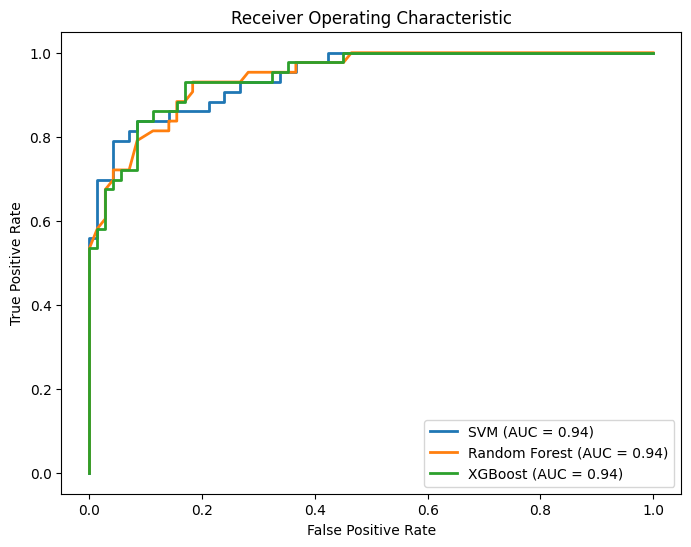

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc as sk_auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ========== 1. 读取数据 ==========
df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")
print("load success\n")

# ========== 2. 计算 VIF，打印所有特征的 VIF 结果 ==========
X = df.drop(columns=['Diagnosis'])

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印所有特征的 VIF 值
print("all features' VIF result:\n", vif_data.sort_values(by="VIF", ascending=False), "\n")

# 放宽 VIF 过滤标准，确保至少 10-15 个特征
filtered_features = vif_data[vif_data["VIF"] <= 15]["Feature"].tolist()

# 如果过滤后特征少于 10 个，使用随机森林选择最重要的 10 个特征
if len(filtered_features) < 10:
    print(" after VIF, too small features, so try to use random forest classifier ...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, df["Diagnosis"])
    feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
    filtered_features = feature_importances.sort_values(by="Importance", ascending=False).head(10)["Feature"].tolist()
    print(" important features:", filtered_features, "\n")

# 如果仍然少于 10 个，放宽 VIF 到 20
if len(filtered_features) < 10:
    print(" still too less, change vif <= 15 to vif <= 20！")
    filtered_features = vif_data[vif_data["VIF"] <= 20]["Feature"].tolist()

print("finally saved featured:", filtered_features, "\n")

# 过滤后的数据
X_filtered = df[filtered_features]
y = df['Diagnosis']

# 处理类别不平衡（SMOTE 前后对比）
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
print(" Original training set category distribution:\n", y_train.value_counts(), "\n")

# 使用 SMOTE 增强数据
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(" SMOTE handled training set category distribution:\n", y_train_resampled.value_counts(), "\n")

# 训练不同的模型
models = {
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=2, random_state=42)
}

# 存储 ROC 结果
plt.figure(figsize=(8,6))

# 训练模型并评估
for name, model in models.items():
    print(f"\n train {name} models...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f" {name} AUC-ROC: {auc_score:.4f}\n")
    print(classification_report(y_test, y_pred))

    # 计算并显示混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    print(f" {name} confusion matrix:\n", cm, "\n")
    
    # 计算并绘制 ROC 曲线
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_score:.2f})')

# 完善 ROC 图表
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc as sk_auc
from imblearn.over_sampling import SMOTE

# 读取原始数据
raw_df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")

# 处理过的数据 (特征筛选后)
processed_df = raw_df.copy()
filtered_features = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se',
                     'smoothness_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                     'smoothness_worst', 'symmetry_worst']
processed_X = processed_df[filtered_features]
processed_y = processed_df['Diagnosis']

# 原始数据（所有特征）
raw_X = raw_df.drop(columns=['Diagnosis'])
raw_y = raw_df['Diagnosis']

# 训练测试集拆分
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_X, raw_y, test_size=0.2, random_state=42)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(processed_X, processed_y, test_size=0.2, random_state=42)

# 使用 SMOTE 处理类别不平衡
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_raw_resampled, y_train_raw_resampled = smote.fit_resample(X_train_raw, y_train_raw)
X_train_proc_resampled, y_train_proc_resampled = smote.fit_resample(X_train_proc, y_train_proc)

# 定义模型
models = {
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=2, random_state=42)
}

# 存储结果
results = []

# 训练和评估模型（原始数据 & 处理过的数据）
for name, model in models.items():
    for data_type, X_train, X_test, y_train, y_test in zip([
        "Raw Data", "Processed Data"],
        [X_train_raw_resampled, X_train_proc_resampled],
        [X_test_raw, X_test_proc],
        [y_train_raw_resampled, y_train_proc_resampled],
        [y_test_raw, y_test_proc]
    ):
        print(f"\training  {name} model ({data_type})...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results.append({
            "Model": name,
            "Data Type": data_type,
            "AUC-ROC": auc_score,
            "Precision_0": report['0']['precision'],
            "Recall_0": report['0']['recall'],
            "F1_0": report['0']['f1-score'],
            "Precision_1": report['1']['precision'],
            "Recall_1": report['1']['recall'],
            "F1_1": report['1']['f1-score'],
            "Accuracy": report['accuracy']
        })

# 转换结果为 DataFrame 并保存到 CSV
results_df = pd.DataFrame(results)
output_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/model_comparison_results.csv"
results_df.to_csv(output_file_path, index=False)

print(f"✅ 模型比较结果已保存到: {output_file_path}")


训练 SVM 模型 (Raw Data)...

训练 SVM 模型 (Processed Data)...

训练 Random Forest 模型 (Raw Data)...

训练 Random Forest 模型 (Processed Data)...

训练 XGBoost 模型 (Raw Data)...

训练 XGBoost 模型 (Processed Data)...
✅ 模型比较结果已保存到: /Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/model_comparison_results.csv
